## Title :

Exercise: Boosting Classification

## Description :

The aim of this exercise to understand classification using boosting by plotting the decision boundary after each stump. Your plot may resemble the image below:

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Read the dataset `boostingclassifier.csv` as pandas dataframe and take a quick look.
- All columns except `landtype` are predictors. `landtype` is the response variable.
- Define the AdaBoost classifier from scratch within the function `AdaBoost_scratch`:
    - Recall the AdaBoost algorithm from the slides:

<img src="../fig/fig2.png" style="width: 500px;">
    
    - Remember, we can derive the learning rate, $$\lambda^{(i)}λ(i)$$ , for our iith estimator, $T^{(i)}T(i)$, analytically. 
 
<img src="../fig/fig3.png" style="width: 500px;">

    - Note: In the exercise we call $$\lambda^{(i)}λ(i)$$ the 'estimator weight.' This is because SKLearn's Adaboost implementation has a learning_rate parameter which refers to a global hyperparameter.
- Call the `AdaBoost_scratch` function with the predictor and response variables for 9 stumps.
- Use the helper code provided to visualize the classification decision boundary for the 9 stumps.

## Hints: 

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">DecisionTreeClassifier()</a>
A decision tree classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">sklearn.fit()</a>
Builds a model from the training set.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.average.html" target="_blank">np.average()</a>
Computes the weighted average along the specified axis.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html?highlight=mean#numpy.mean" target="_blank">np.mean()</a>
Computes the arithmetic mean along the specified axis.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html?highlight=log#numpy.log" target="_blank">np.log()</a>
Natural logarithm, element-wise.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp" target="_blank">np.exp()</a>
Calculates the exponential of all elements in the input array.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier" target="_blank">sklearn.AdaBoostClassifier()</a>
An AdaBoost classifier.

**Note:** This exercise is **auto-graded and you can make multiple attempts.**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper import plot_decision_boundary
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
sns.set_style('white')


In [2]:
# Read the dataset as a pandas dataframe
df = pd.read_csv("../data/boostingclassifier.csv")

# Read the columns latitude and longitude as the predictor variables
X = df[['latitude','longitude']].values

# Landtype is the response variable
y = df['landtype'].values

In [3]:
df.head()

latitude  longitude  landtype
0 -0.070288  -1.143493         0
1  0.521946  -0.043497         1
2 -0.708091  -0.870615         0
3  0.729733  -0.045884         1
4 -1.760767  -1.789587         0

In [4]:
### edTest(test_response) ###
# update the class labels to appropriate values for AdaBoost
y = np.array([-1 if i ==0 else 1 for i in y])

In [5]:
# AdaBoost algorithm implementation from scratch

def AdaBoost_scratch(X, y, M=10):
    '''
    X: data matrix of predictors
    y: response variable
    M: number of estimators (e.g., 'stumps')
    '''

    # Initialization of utility variables
    N = len(y)
    estimator_list = []
    y_predict_list = []
    estimator_error_list = []
    estimator_weight_list = []
    sample_weight_list = []

    # Initialize the sample weights
    sample_weight = np.ones(N) / N
    
    # Store a copy of the sample weights to a list
    # Q: why do we want to use .copy() here? The implementation will make it clear.
    sample_weight_list.append(sample_weight.copy())
    # a = np.array(), l.append(a)
    # if a = another np.array(), won't change l
    # if a[0] = another num, will change l
    # if a = a *3, it changes the elements, will change l

    # Fit each boosted stump
    # Q: Why might we prefer the variable name '_' here over something like 'm'?
    for _ in range(M):   
        # Instantiate a Decision Tree classifier for our stump
        # Note: our stumps should have only a single split
        estimator = DecisionTreeClassifier(max_depth=1)
        
        # Fit the stump on the entire data with using the sample_weight variable
        # Hint: check the estimator's documentation for how to use sample weights
        estimator.fit(X, y, sample_weight=sample_weight)
        
        # Predict on the entire data
        y_predict = estimator.predict(X)

        # Create a binary vector representing the misclassifications
        incorrect = 1* (y_predict != y)

        # Compute the error as the weighted average of the 
        # 'incorrect' vector above using the sample weights
        # Hint: np.average() makes this very simple
        estimator_error = np.average(incorrect, weights = sample_weight)
        
        # Compute the estimator weight using the estimator error
        # Note: The estimator weight here is refered to as the 'learning rate' in the slides
        estimator_weight =  1/2 * np.log((1-estimator_error)/estimator_error)
        # log() natural logarithm of its input, which is equivalent to the base-e logarithm
        # log(x, 10) base-10 logarithm

        # Update the sample weights (un-normalized!)
        # Note: Make use of the '*=' assignment statement
        sample_weight *= np.exp(-1 * estimator_weight*y_predict*y)
        # x *= y: x = x*y

        # Renormalize the sample weights
        # Note: Make use of the '/=' assignment statement
        sample_weight /= np.sum(sample_weight)
        # x /= y is equivalent to x = x / y

        # Save the iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        

    # Convert to numpy array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Compute the predictions
    # Q: Why do we want to use np.sign() here?
    preds = (np.array([np.sign((y_predict_list[:,point] * \
    estimator_weight_list).sum()) for point in range(N)]))
    # np.sign() Returns an element-wise indication of the sign of a number.
    
    # Return the model, estimated weights and sample weights
    return estimator_list, estimator_weight_list, sample_weight_list, preds
    

In [6]:
a = np.array([1,2,3])
b = np.array([1,2,3])
a*b

array([1, 4, 9])

In [7]:
### edTest(test_adaboost) ###
# Call the AdaBoost function to perform boosting classification
estimator_list, estimator_weight_list, sample_weight_list, preds  = \
AdaBoost_scratch(X,y, M=9)

# Calculate the model's accuracy from the predictions returned above
accuracy = ((1*(y == preds)).sum())/len(y)
print(f'accuracy: {accuracy:.3f}')

accuracy: 0.956


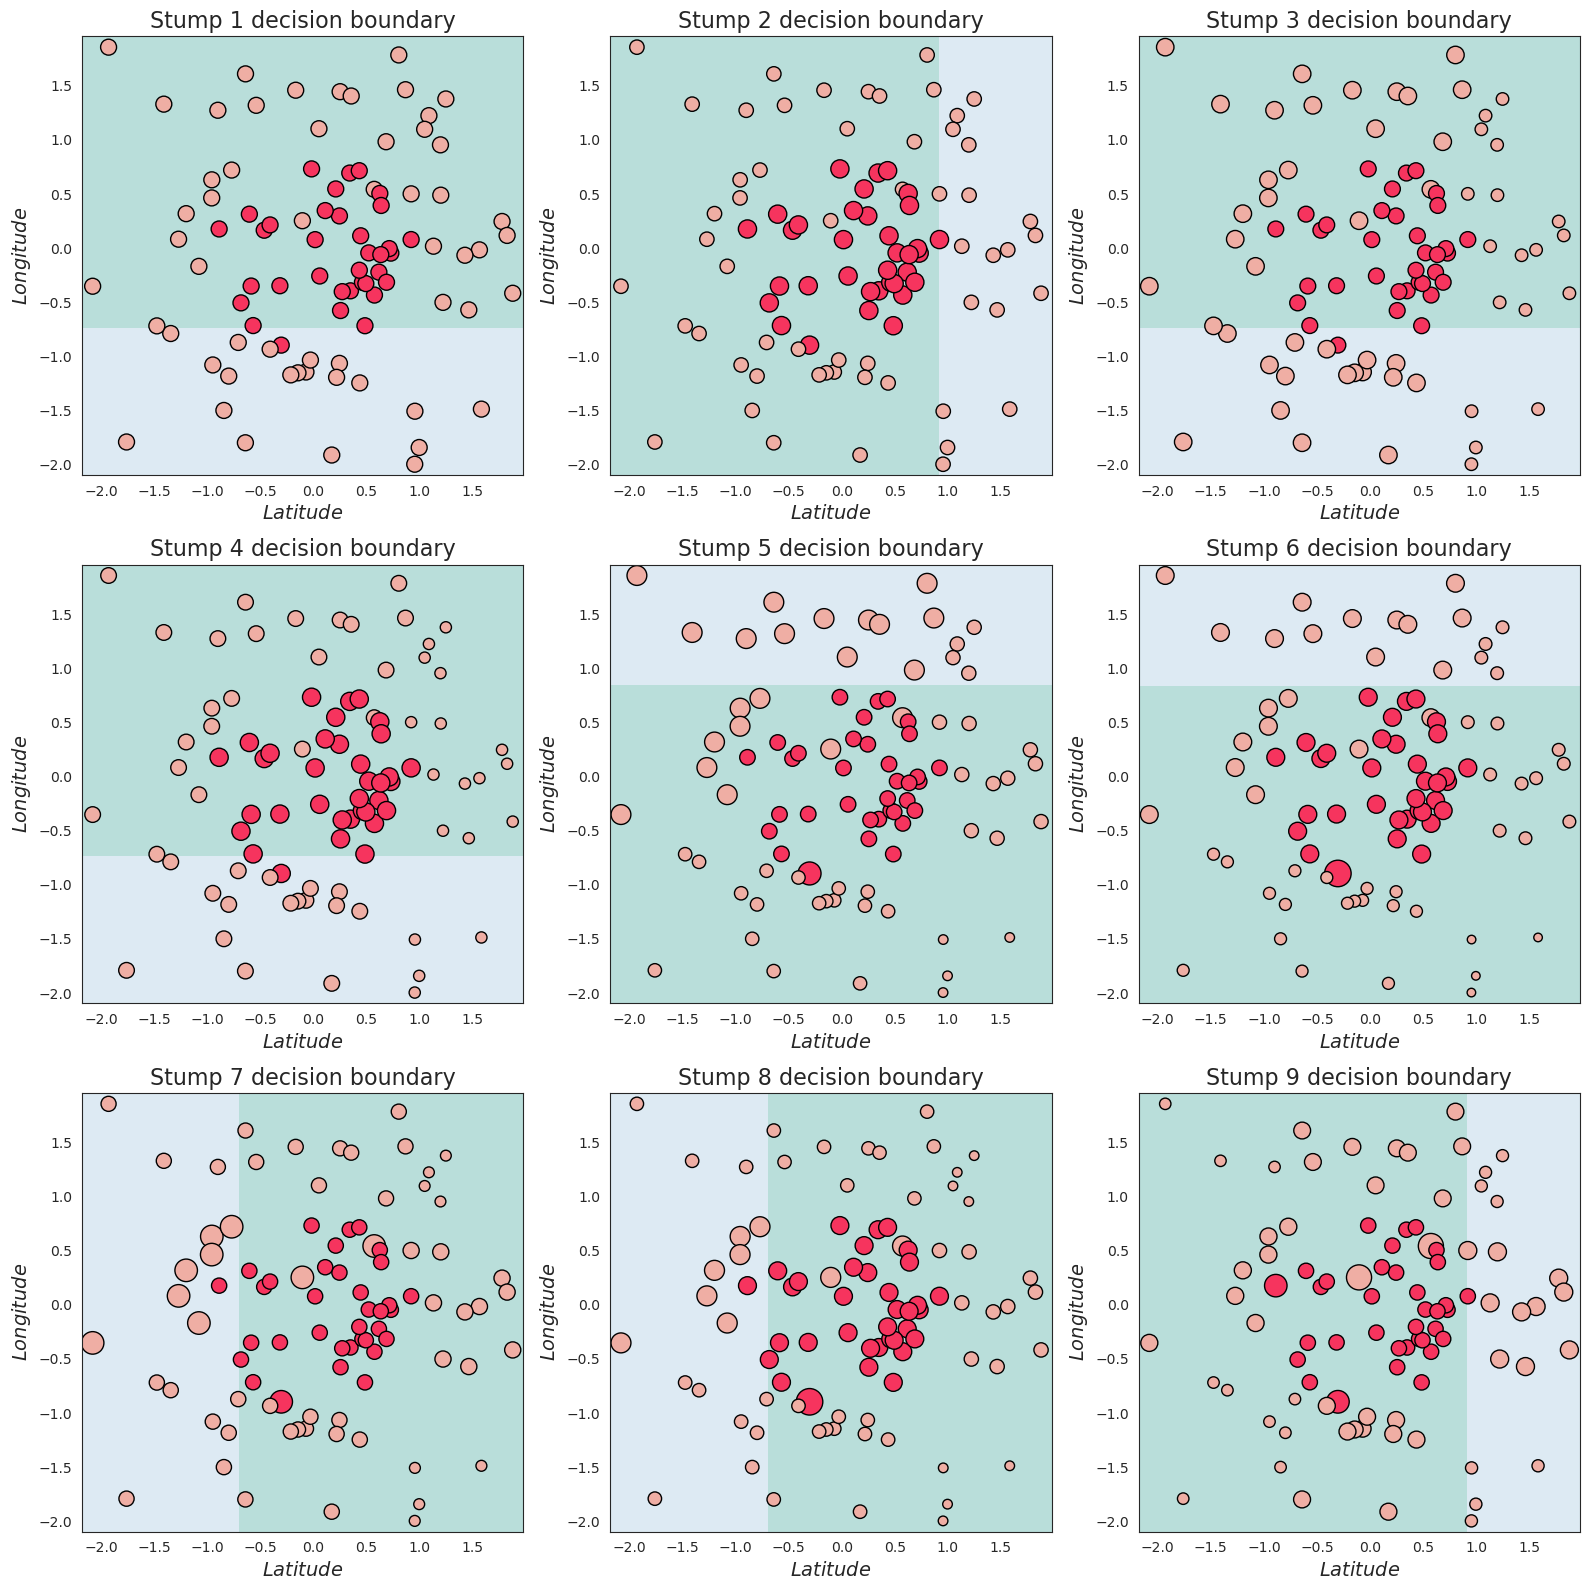

In [8]:
# Helper code to plot the AdaBoost Decision Boundary stumps
fig = plt.figure(figsize = (16,16))
for m in range(0, 9):
    fig.add_subplot(3,3,m+1)
    # Three integers (nrows, ncols, index).
    # index starts at 1 in the upper left corner and increases to the right.
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 300
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights,counter=m)
    plt.tight_layout()
    

/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


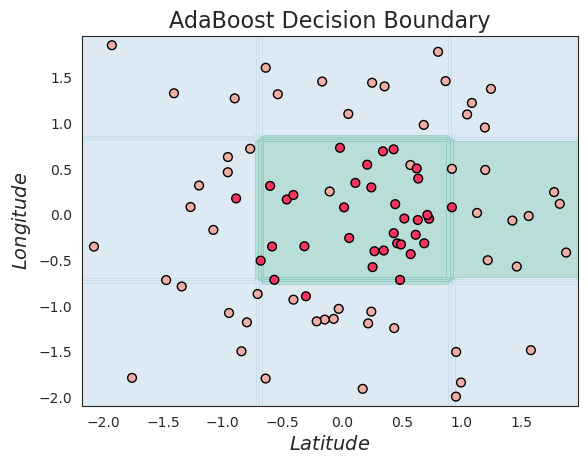

In [12]:
# Use sklearn's AdaBoostClassifier to take a look at the final decision boundary 

# Initialise the model with Decision Tree classifier as the base model same as above
# Use SAMME as the algorithm and 9 estimators
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME', n_estimators=9)

# Fit on the entire data
boost.fit(X,y)

# Call the plot_decision_boundary function to plot the decision boundary of the model 
plot_decision_boundary(boost, X,y, N = 50)

plt.title('AdaBoost Decision Boundary', fontsize=16)
plt.show()


⏸ How does the `num_estimators` affect the model?

In [10]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = '___'
